<a href="https://colab.research.google.com/github/annalamboglia/Minicontest/blob/main/Minicontest2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
#Collegamento al Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# importo il csv

with open("/content/drive/MyDrive/Minicontest2/Training.xlsx", 'rb') as fp:
    df = pd.read_excel(fp)

df

,Material_1,Type_1,Pretreatment_1,Moisture_1,Volatiles_1,Fixed Carbon_1,Ash_1,"HHV, MJ/Kg_1",C_1,H_1,N_1,O_1,S_1,Cl_1,H/C(0)_1,O/C(0)_1,Cellulose_1,Hemicellulose_1,Lignin_1,Extractives_1,"Particle Size, mm_1",O/C oil
0,japonica alga,algae,acid_washed,5.03,NaN,NaN,7.32,14.27,43.76,6.00,2.76,55.38,NaN,NaN,0.137112,1.265539,NaN,NaN,NaN,NaN,NaN,0.469887
1,bamboo,agricultural_waste,none,7.30,90.90,0.10,1.70,17.70,46.90,5.85,0.21,47.02,0.02,NaN,0.124733,1.002559,41.0,26.5,25.3,NaN,0.6,2.561132
2,japonica alga,algae,none,6.90,NaN,NaN,20.21,16.96,41.22,7.73,1.17,49.88,NaN,NaN,0.187530,1.210092,NaN,NaN,NaN,NaN,NaN,0.393652
3,beech wood,hardwood,none,8.00,NaN,NaN,0.54,NaN,48.44,5.83,NaN,45.73,NaN,NaN,0.120355,0.944055,NaN,NaN,NaN,NaN,NaN,0.236315
4,rice straw,agricultural_waste,none,10.80,66.89,14.57,7.56,NaN,39.98,2.45,4.43,52.61,0.53,NaN,0.061281,1.315908,NaN,NaN,NaN,NaN,0.6 mm <particle diameter < 1.18 mm,1.952824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,rice straw,agricultural_waste,none,6.48,82.30,1.50,8.90,16.00,43.25,5.62,2.11,48.80,0.22,NaN,0.129942,1.128324,37.8,25.3,23.3,NaN,NaN,0.307387
173,sugarcane bagasse,agricultural_waste,none,16.07,79.59,NaN,4.34,18.61,58.14,6.05,0.69,34.57,0.19,0.36,0.104059,0.594599,NaN,NaN,NaN,NaN,NaN,0.494919
174,switch grass,grass,none,7.82,72.04,15.46,4.68,NaN,47.50,5.57,0.65,45.28,NaN,NaN,0.117263,0.953263,NaN,NaN,NaN,NaN,NaN,0.018292
175,white ash,forest residue,none,10.54,75.83,13.22,0.41,NaN,47.45,6.53,0.43,45.59,NaN,NaN,0.137619,0.960801,NaN,NaN,NaN,NaN,NaN,0.015102


In [4]:
#Look at the data types whitch columns need to be encoded
df.dtypes

Material_1              object
Type_1                  object
Pretreatment_1          object
Moisture_1             float64
Volatiles_1            float64
Fixed Carbon_1         float64
Ash_1                  float64
HHV, MJ/Kg_1           float64
C_1                    float64
H_1                    float64
N_1                    float64
O_1                    float64
S_1                    float64
Cl_1                   float64
H/C(0)_1               float64
O/C(0)_1               float64
Cellulose_1            float64
Hemicellulose_1        float64
Lignin_1               float64
Extractives_1          float64
Particle Size, mm_1     object
O/C oil                float64
dtype: object

In [5]:
#NaN Values
df1 = df[df.isna().any(axis=1)]

df1

,Material_1,Type_1,Pretreatment_1,Moisture_1,Volatiles_1,Fixed Carbon_1,Ash_1,"HHV, MJ/Kg_1",C_1,H_1,N_1,O_1,S_1,Cl_1,H/C(0)_1,O/C(0)_1,Cellulose_1,Hemicellulose_1,Lignin_1,Extractives_1,"Particle Size, mm_1",O/C oil
0,japonica alga,algae,acid_washed,5.03,NaN,NaN,7.32,14.27,43.76,6.00,2.76,55.38,NaN,NaN,0.137112,1.265539,NaN,NaN,NaN,NaN,NaN,0.469887
1,bamboo,agricultural_waste,none,7.30,90.90,0.10,1.70,17.70,46.90,5.85,0.21,47.02,0.02,NaN,0.124733,1.002559,41.0,26.5,25.3,NaN,0.6,2.561132
2,japonica alga,algae,none,6.90,NaN,NaN,20.21,16.96,41.22,7.73,1.17,49.88,NaN,NaN,0.187530,1.210092,NaN,NaN,NaN,NaN,NaN,0.393652
3,beech wood,hardwood,none,8.00,NaN,NaN,0.54,NaN,48.44,5.83,NaN,45.73,NaN,NaN,0.120355,0.944055,NaN,NaN,NaN,NaN,NaN,0.236315
4,rice straw,agricultural_waste,none,10.80,66.89,14.57,7.56,NaN,39.98,2.45,4.43,52.61,0.53,NaN,0.061281,1.315908,NaN,NaN,NaN,NaN,0.6 mm <particle diameter < 1.18 mm,1.952824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,rice straw,agricultural_waste,none,6.48,82.30,1.50,8.90,16.00,43.25,5.62,2.11,48.80,0.22,NaN,0.129942,1.128324,37.8,25.3,23.3,NaN,NaN,0.307387
173,sugarcane bagasse,agricultural_waste,none,16.07,79.59,NaN,4.34,18.61,58.14,6.05,0.69,34.57,0.19,0.36,0.104059,0.594599,NaN,NaN,NaN,NaN,NaN,0.494919
174,switch grass,grass,none,7.82,72.04,15.46,4.68,NaN,47.50,5.57,0.65,45.28,NaN,NaN,0.117263,0.953263,NaN,NaN,NaN,NaN,NaN,0.018292
175,white ash,forest residue,none,10.54,75.83,13.22,0.41,NaN,47.45,6.53,0.43,45.59,NaN,NaN,0.137619,0.960801,NaN,NaN,NaN,NaN,NaN,0.015102


In [6]:
#Count the number of empty values of each columns in dataset
df.isna().sum()

Material_1               0
Type_1                   8
Pretreatment_1           1
Moisture_1              51
Volatiles_1             43
Fixed Carbon_1          49
Ash_1                   12
HHV, MJ/Kg_1            94
C_1                     13
H_1                     13
N_1                     36
O_1                     14
S_1                    111
Cl_1                   172
H/C(0)_1                13
O/C(0)_1                13
Cellulose_1             93
Hemicellulose_1        107
Lignin_1               102
Extractives_1          128
Particle Size, mm_1    143
O/C oil                  0
dtype: int64

In [7]:
df=df.drop(columns=["Cl_1","Extractives_1"])

#Correlazione

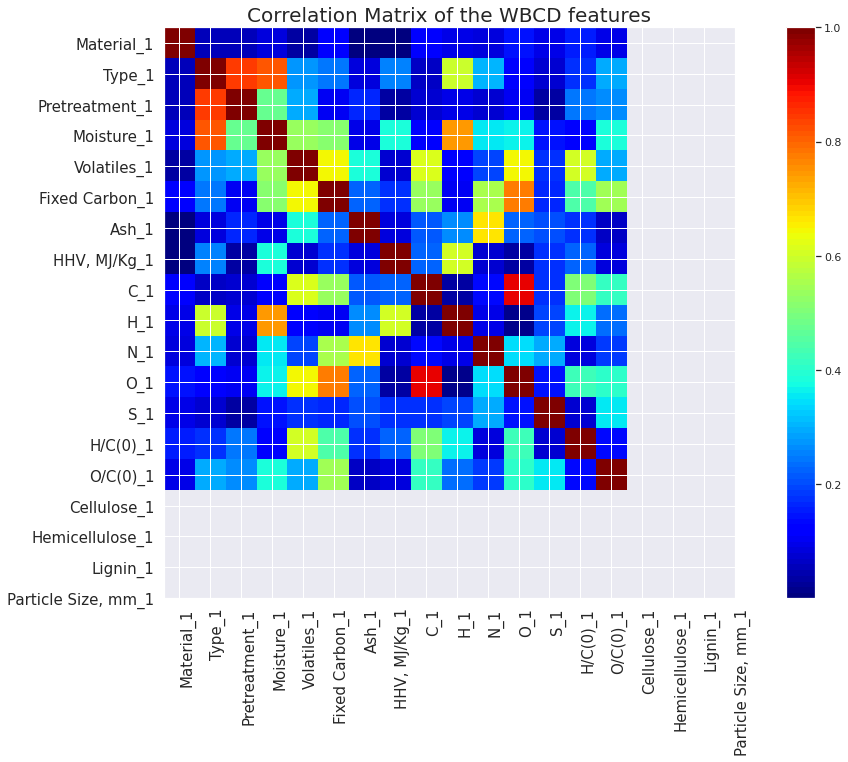

In [8]:
# Bivariate Analysis
# Make a Features Correlation Matrix of the WBCD features
# Readapted from AN6U5

def features_correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm
    fig = plt.figure()
    fig.set_size_inches(18.5, 10.5)
    ax1 = fig.add_subplot(111)
    
    cmap = cm.get_cmap('jet', 100)
    
    # interpolation='nearest' simply displays an image without 
    # trying to interpolate between pixels if the display 
    # resolution is not the same as the image resolution
    # The correlation is returned in absolute values:
    cax = ax1.imshow(df.corr().abs(), interpolation="nearest", \
                     cmap=cmap)
    ax1.grid(True)
    plt.title('Correlation Matrix of the WBCD features',fontsize=20)
    labels=list(df.columns)
    
    ax1.set_xticks(np.arange(len(labels)))
    ax1.set_yticks(np.arange(len(labels)))
    
    ax1.set_xticklabels(labels,fontsize=15,\
              horizontalalignment="left", rotation='vertical')
    
    ax1.set_yticklabels(labels,fontsize=15)
    
    # Add a colorbar
    fig.colorbar(cax, ticks=[-1.0, -0.8, -0.6, -0.4, -0.2, 0, \
                             0.2, 0.4, 0.6, 0.8, 1])
    plt.show()


# Drop the Outcome column from Df and copy it into df_features
df_features = df.drop(df.columns[-1],axis=1)
# Run the correlation_matrix function, using df_features as argument
features_correlation_matrix(df_features)

In [9]:
# Dropping of features with a correlation greater than 0.8
# Code readapted from Chris Albon
# Create the correlation matrix with absolute values
corr_matrix = df_features.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

In [10]:
to_drop

['Fixed Carbon_1', 'Ash_1', 'O/C(0)_1']

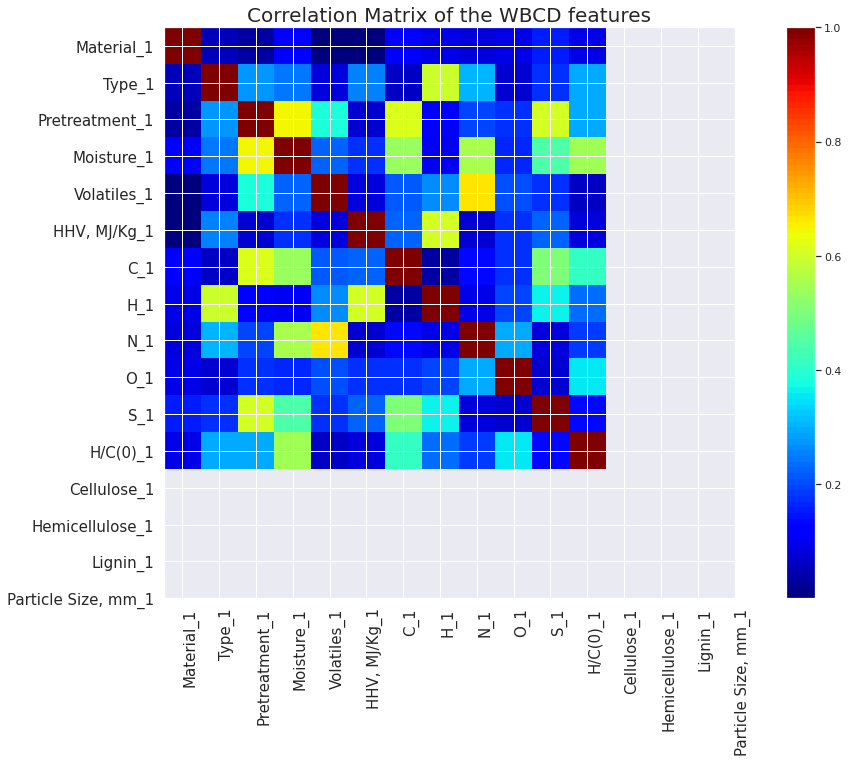

In [11]:
# Drop the redundant features from the df
df_features_corr_dropped = df_features.drop(df_features[to_drop], axis=1)

# Re-plot the dropped df containing only not-redundant features
# Using the feature_correlation_matrix() function
features_correlation_matrix(df_features_corr_dropped)

In [12]:
# Print a table with all the features correlations
# Redundant features were dropped from the original 30 features dataset
# To get the correlation, we apply the .corr() method
# followed by the .abs() method to the df_features_corr_dropped DataFrame
df_features_corr_dropped.corr().abs()

,Moisture_1,Volatiles_1,"HHV, MJ/Kg_1",C_1,H_1,N_1,O_1,S_1,H/C(0)_1,Cellulose_1,Hemicellulose_1,Lignin_1
Moisture_1,1.000000,0.054692,0.033974,0.117045,0.009070,0.000106,0.119112,0.094145,0.087100,0.091152,0.153174,0.090820
Volatiles_1,0.054692,1.000000,0.277812,0.249359,0.080177,0.255256,0.069037,0.599977,0.304352,0.072116,0.177574,0.298567
"HHV, MJ/Kg_1",0.033974,0.277812,1.000000,0.643469,0.390053,0.075775,0.616884,0.129389,0.191990,0.172727,0.600438,0.298651
C_1,0.117045,0.249359,0.643469,1.000000,0.224369,0.171533,0.531252,0.107326,0.551053,0.163093,0.446867,0.544235
H_1,0.009070,0.080177,0.390053,0.224369,1.000000,0.084019,0.210793,0.266188,0.669096,0.201306,0.171631,0.068360
N_1,0.000106,0.255256,0.075775,0.171533,0.084019,1.000000,0.225466,0.607738,0.079665,0.173752,0.221152,0.086579
O_1,0.119112,0.069037,0.616884,0.531252,0.210793,0.225466,1.000000,0.034509,0.131053,0.174177,0.505006,0.410636
S_1,0.094145,0.599977,0.129389,0.107326,0.266188,0.607738,0.034509,1.000000,0.092991,0.190215,0.362142,0.231900
H/C(0)_1,0.087100,0.304352,0.191990,0.551053,0.669096,0.079665,0.131053,0.092991,1.000000,0.290752,0.082525,0.187861
Cellulose_1,0.091152,0.072116,0.172727,0.163093,0.201306,0.173752,0.174177,0.190215,0.290752,1.000000,0.073139,0.351094


In [13]:
df=df.drop(columns=to_drop)

#Encoding

In [14]:
categorical_cols=df.columns[df.dtypes==object].tolist()
categorical_cols

['Material_1', 'Type_1', 'Pretreatment_1', 'Particle Size, mm_1']

In [15]:
df["Material_1_cat"]=df["Material_1"].astype('category').cat.codes
df["Type_1_cat"]=df["Type_1"].astype('category').cat.codes
df["Pretreatment_1_cat"]=df["Pretreatment_1"].astype('category').cat.codes
df["Particle Size, mm_1_cat"]=df["Particle Size, mm_1"].astype('category').cat.codes
df.head()

,Material_1,Type_1,Pretreatment_1,Moisture_1,Volatiles_1,"HHV, MJ/Kg_1",C_1,H_1,N_1,O_1,S_1,H/C(0)_1,Cellulose_1,Hemicellulose_1,Lignin_1,"Particle Size, mm_1",O/C oil,Material_1_cat,Type_1_cat,Pretreatment_1_cat,"Particle Size, mm_1_cat"
0,japonica alga,algae,acid_washed,5.03,NaN,14.27,43.76,6.00,2.76,55.38,NaN,0.137112,NaN,NaN,NaN,NaN,0.469887,22,1,0,-1
1,bamboo,agricultural_waste,none,7.30,90.90,17.70,46.90,5.85,0.21,47.02,0.02,0.124733,41.0,26.5,25.3,0.6,2.561132,5,0,2,11
2,japonica alga,algae,none,6.90,NaN,16.96,41.22,7.73,1.17,49.88,NaN,0.187530,NaN,NaN,NaN,NaN,0.393652,22,1,2,-1
3,beech wood,hardwood,none,8.00,NaN,NaN,48.44,5.83,NaN,45.73,NaN,0.120355,NaN,NaN,NaN,NaN,0.236315,6,5,2,-1
4,rice straw,agricultural_waste,none,10.80,66.89,NaN,39.98,2.45,4.43,52.61,0.53,0.061281,NaN,NaN,NaN,0.6 mm <particle diameter < 1.18 mm,1.952824,40,0,2,12


In [16]:
df.columns

Index(['Material_1', 'Type_1', 'Pretreatment_1', 'Moisture_1', 'Volatiles_1',
       'HHV, MJ/Kg_1', 'C_1', 'H_1', 'N_1', 'O_1', 'S_1', 'H/C(0)_1',
       'Cellulose_1', 'Hemicellulose_1', 'Lignin_1', 'Particle Size, mm_1',
       'O/C oil', 'Material_1_cat', 'Type_1_cat', 'Pretreatment_1_cat',
       'Particle Size, mm_1_cat'],
      dtype='object')

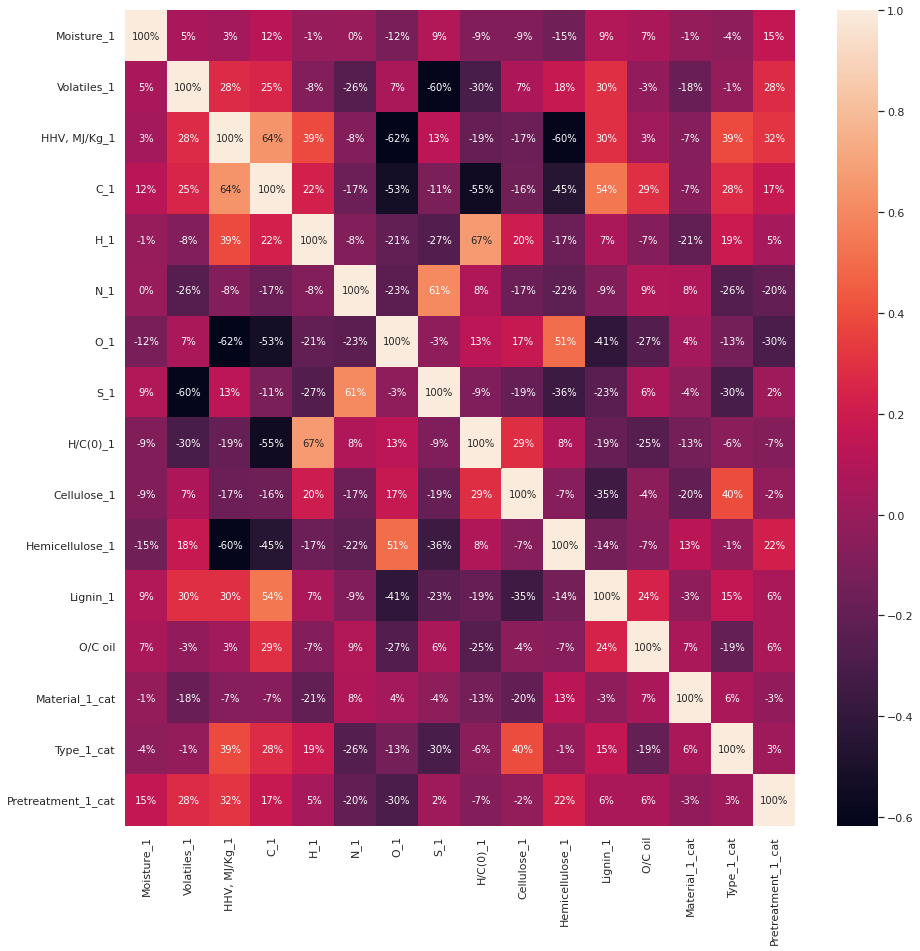

In [17]:
#Visualize the correlation
plt.figure(figsize=(15,15))
sns.heatmap(df.iloc[:,1:df.shape[1]-1].corr(), annot=True, fmt='.0%')

Split

In [18]:
X=df.drop(columns=["O/C oil", 'Material_1', 'Type_1', 'Pretreatment_1', 'Particle Size, mm_1'])
Y=df["O/C oil"]

In [19]:
#Split the training e validation 75% and 25% testing
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [20]:
#Split the training e validation 75% and 25% testing
from sklearn.model_selection import train_test_split

X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, test_size=0.25, random_state=0)

Missing value

In [21]:
import statistics
mediane={}
mediane_tot={}

for column in X_train.columns:
  mediana=X_train.groupby("Material_1_cat")[column].transform("median")
  X_train[column].fillna(mediana, inplace=True)
  #mediana=statistics.median(X_train[column])
  mediane.update({column: mediana})
  print(str(column) + ": " + str(statistics.median(X_train[column])))


Moisture_1: 7.03
Volatiles_1: 90.9
HHV, MJ/Kg_1: nan
C_1: 47.4
H_1: 5.44
N_1: nan
O_1: 36.84
S_1: nan
H/C(0)_1: 0.109677419354839
Cellulose_1: 100.0
Hemicellulose_1: nan
Lignin_1: nan
Material_1_cat: 34
Type_1_cat: 5
Pretreatment_1_cat: 2
Particle Size, mm_1_cat: -1


In [22]:
for column in X_train.columns[3:-1]:
  
  X_train[column]=X_train[column].fillna(mediane[column])
  X_validation[column]=X_validation[column].fillna(mediane[column])
  X_test[column]=X_test[column].fillna(mediane[column])

X_train=X_train.fillna(-1)
X_validation=X_validation.fillna(-1)
X_test=X_test.fillna(-1)

In [23]:
#NaN Values
df1 = X_train[X_train.isna().any(axis=1)]

df1

,Moisture_1,Volatiles_1,"HHV, MJ/Kg_1",C_1,H_1,N_1,O_1,S_1,H/C(0)_1,Cellulose_1,Hemicellulose_1,Lignin_1,Material_1_cat,Type_1_cat,Pretreatment_1_cat,"Particle Size, mm_1_cat"


Normalizzazione

In [24]:
#Scale the data (Feature Scaling Z Score) z = (x - u) / s
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_validation=sc.transform(X_validation)
X_test = sc.transform(X_test)

In [25]:
X_train = np.array(X_train)
X_validation=np.array(X_validation)
X_test = np.array(X_test)

Y_train = np.array(Y_train)
Y_validation=np.array(Y_validation)
Y_test = np.array(Y_test)

#Decision Tree

In [74]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor 
dtr_model = DecisionTreeRegressor(random_state=12)
dtr_model.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=12)

Validation

In [75]:
# test the output by changing values, like 3750
y_pred = dtr_model.predict(X_validation)
  
# print the predicted price
print("Predicted O/C oil:")
print(y_pred) 

Predicted O/C oil:
[0.22418693 0.50155914 0.51910499 0.045      0.27452189 0.22418693
 0.07610176 0.06348438 0.90725806 2.09310345 0.40237193 0.01284999
 0.59123435 1.01100845 1.01100845 0.50797006 0.51910499 0.51910499
 0.0961828  4.45849421 0.4        0.35637969 0.35637969 0.52542927
 1.02649007 0.22731103 0.0961828  2.56113208 2.09310345 0.8995687
 0.51910499 0.0961828  0.59123435]


In [76]:
from sklearn.metrics import mean_absolute_error

y_pred = dtr_model.predict(X_validation)
print(mean_absolute_error(Y_validation, y_pred), dtr_model.get_depth())
#get_depth returns the depth of the tree

0.27305735302804557 17


Test

In [77]:
# test the output by changing values, like 3750
y_pred_test = dtr_model.predict(X_test)
  
# print the predicted price
print("Predicted O/C oil:")
print(y_pred_test) 

Predicted O/C oil:
[0.22418693 0.0961828  0.22418693 0.22418693 0.59123435 0.14773106
 1.01100845 0.045      1.01100845 0.90725806 0.22731103 0.24087168
 0.90725806 0.7358741  0.10518333 2.09310345 0.582      0.59123435
 0.26351351 0.61904762 0.045      0.04164612 0.33117859 0.92745218
 0.04164612 0.30504009 0.22731103 0.30504009 0.27452189 0.0961828
 0.26351351 0.50155914 0.6964548  0.61904762 0.61904762 0.8995687
 0.045      0.51910499 2.09310345 1.01100845 0.7358741  0.50155914
 0.51910499 0.22418693 0.52542927]


In [73]:
from sklearn.metrics import mean_absolute_error

y_pred_test = dtr_model.predict(X_test)
print(mean_absolute_error(Y_test, y_pred_test), dtr_model.get_depth())
#get_depth returns the depth of the tree

0.3318758927693795 6


In [63]:
# import export_graphviz
from sklearn.tree import export_graphviz 
  
# export the decision tree to a tree.dot file
# for visualizing the plot easily anywhere
export_graphviz(dtr_model, out_file ='tree.dot',
               feature_names = X.columns) 

#Random Forest

In [120]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor 
rf = RandomForestRegressor(n_estimators=200, random_state=12)
rf.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=200, random_state=12)

Validation

In [121]:
# test the output by changing values, like 3750
y_pred = rf.predict(X_validation)
  
# print the predicted price
print("Predicted O/C oil:")
print(y_pred) 

Predicted O/C oil:
[0.31194116 0.43046851 0.58436023 0.28678452 0.27878559 0.27784814
 0.12773934 0.11515267 0.71942359 0.79512011 0.53268664 0.1818612
 1.20559634 0.93309396 0.82556456 0.54627475 0.70615209 0.58436023
 0.21137533 2.56234442 0.741689   0.45065698 0.45065698 0.58493463
 0.75056629 0.47973738 0.17369874 1.81923942 1.21188226 1.01125805
 0.70520706 0.1733849  1.17809407]


In [122]:
from sklearn.metrics import mean_absolute_error

y_pred = dtr_model.predict(X_validation)
print(mean_absolute_error(Y_validation, y_pred))
#get_depth returns the depth of the tree

0.27305735302804557


Test

In [123]:
# test the output by changing values, like 3750
y_pred_test = rf.predict(X_test)
  
# print the predicted price
print("Predicted O/C oil:")
print(y_pred_test) 

Predicted O/C oil:
[0.28435584 0.17603795 0.27784814 0.40155116 1.17809407 0.20502289
 0.98299673 0.29447374 0.98299673 0.71586785 0.75471882 0.25071242
 0.73091776 0.6878837  0.18157373 1.21188226 0.22633789 0.69047306
 0.29993273 0.92107994 0.07280841 0.15369246 0.87059447 0.83990567
 0.11556224 0.28793514 0.53901947 0.28793514 0.27878559 0.18448495
 0.29993273 0.43046851 0.52965895 0.92107994 0.92107994 1.25006172
 0.1131743  0.58436023 1.21188226 1.14269993 0.69759554 0.32602449
 0.68177185 0.40155116 0.58493463]


In [124]:
from sklearn.metrics import mean_absolute_error

y_pred_test = rf.predict(X_test)
print(mean_absolute_error(Y_test, y_pred_test))
#get_depth returns the depth of the tree

0.3621912424030793


In [125]:
# import export_graphviz
from sklearn.tree import export_graphviz 
  
# export the decision tree to a tree.dot file
# for visualizing the plot easily anywhere
export_graphviz(dtr_model, out_file ='tree.dot',
               feature_names = X.columns) 

#Linear Regression

In [43]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [44]:
# test the output by changing values, like 3750
y_pred = regressor.predict(X_validation)
  
# print the predicted price
print("Predicted O/C oil:")
print(y_pred) 

Predicted O/C oil:
[-1.05755402  0.42997191  1.16406152 -0.14249273  0.75566844  0.00793976
  0.17795011  0.02620558  0.61357694  0.68599087 -0.17456938  0.28709747
  0.18872729  0.35516259  0.97097268  0.55146584  0.56013284  1.16406152
  1.21230873  2.87903918  1.70590429  0.32307617  0.32307617  0.41397996
  0.96734083 -0.2995933  -0.28266913  1.03140697  0.49615572  1.65862981
  0.57784     0.32209918  0.22144058]


In [45]:
from sklearn.metrics import mean_absolute_error

y_pred = regressor.predict(X_validation)
print(mean_absolute_error(Y_validation, y_pred))


0.4860560192585534


#Models

In [46]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score
from time import time

from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [47]:
regressors = [
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge()
]

In [48]:
head = 10
for model in regressors[:head]:
    start = time()
    model.fit(X_train, Y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_validation)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(Y_validation, y_pred))
    print("\tMean absolute error:", mean_absolute_error(Y_validation, y_pred))
    print("\tR2 score:", r2_score(Y_validation, y_pred))
    print()

KNeighborsRegressor()
	Training time: 0.000s
	Prediction time: 0.002s
	Explained variance: 0.0896426297613595
	Mean absolute error: 0.5027684839488219
	R2 score: 0.07169126310400264

GradientBoostingRegressor()
	Training time: 0.062s
	Prediction time: 0.000s
	Explained variance: 0.6637612385760616
	Mean absolute error: 0.32802539925105645
	R2 score: 0.662053485595042

ExtraTreesRegressor()
	Training time: 0.122s
	Prediction time: 0.013s
	Explained variance: 0.528777986615638
	Mean absolute error: 0.4105639182696837
	R2 score: 0.5161223636211165

RandomForestRegressor()
	Training time: 0.174s
	Prediction time: 0.009s
	Explained variance: 0.5698052612656423
	Mean absolute error: 0.37244049728989115
	R2 score: 0.5688908094547183

DecisionTreeRegressor()
	Training time: 0.001s
	Prediction time: 0.000s
	Explained variance: 0.6934301942028853
	Mean absolute error: 0.28729697572844026
	R2 score: 0.6905737940077722

LinearRegression()
	Training time: 0.001s
	Prediction time: 0.000s
	Explained 

In [49]:
from sklearn.model_selection import GridSearchCV

In [38]:
parameters = { 'loss' : ['ls', 'lad', 'huber', 'quantile'],
              'learning_rate' : (0.05,0.25,0.50,1),
              'criterion' : ['friedman_mse', 'mse', 'mae'],
              'max_features' : ['auto', 'sqrt', 'log2']
             }

In [78]:
tree_param = {'max_depth':[4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}

In [79]:
df_1=pd.DataFrame(X_train)
df_2=pd.DataFrame(X_validation)

X_n=df_1.append(df_2, ignore_index=True)

df_1=pd.DataFrame(Y_train)
df_2=pd.DataFrame(Y_validation)

Y_n=df_1.append(df_2, ignore_index=True)

X_n=np.array(X_n)
Y_n=np.array(Y_n)


X_n_test=X_test
Y_n_test=Y_test

In [89]:
grid = GridSearchCV(DecisionTreeRegressor(), tree_param)
model = grid.fit(X_n,Y_n)
print(model.best_params_,'\n')
print(model.best_estimator_,'\n')

{'max_depth': 4} 

DecisionTreeRegressor(max_depth=4) 



In [81]:
#{'criterion': 'mae', 'learning_rate': 0.05, 'loss': 'ls', 'max_features': 'auto'} 

model=GradientBoostingRegressor(criterion='mae', learning_rate=0.05, loss='ls',
                          max_features='auto') 

In [102]:
#{'criterion': 'mae', 'learning_rate': 0.05, 'loss': 'huber', 'max_features': 'auto'} 

model=DecisionTreeRegressor(max_depth=4)

In [103]:
model.fit(X_n, Y_n)

DecisionTreeRegressor(max_depth=4)

In [104]:
y_pred=model.predict(X_n_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


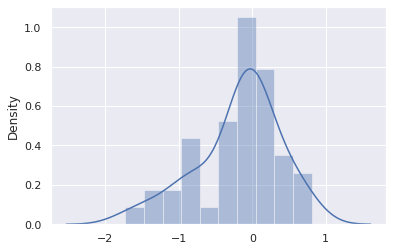

In [105]:
sns.distplot(y_pred-Y_n_test)

In [50]:
df_1 = pd.DataFrame(grid.cv_results_).set_index('rank_test_score').sort_index()
df_1.shape

(144, 16)

In [106]:
from sklearn.metrics import mean_absolute_error

y_pred = model.predict(X_n_test)
print(mean_absolute_error(Y_n_test, y_pred))

0.4258524197212394


#Soluzione Finale

In [ ]:
# importo il csv

with open("/content/drive/MyDrive/Minicontest2/Test.xlsx", 'rb') as fp:
    df_test = pd.read_excel(fp)

df_test

In [134]:
df_test=df_test.drop(columns=["O/C oil"], axis=1)           

In [ ]:
df1 = df_test[df_test.isna().any(axis=1)]

df1

In [136]:
categorical_cols=df_test.columns[df_test.dtypes==object].tolist()
categorical_cols

['Material_1', 'Type_1', 'Pretreatment_1', 'Particle Size, mm_1']

In [137]:
df_test["Material_1_cat"]=df_test["Material_1"].astype('category').cat.codes
df_test["Type_1_cat"]=df_test["Type_1"].astype('category').cat.codes
df_test["Pretreatment_1_cat"]=df_test["Pretreatment_1"].astype('category').cat.codes
df_test["Particle Size, mm_1_cat"]=df_test["Particle Size, mm_1"].astype('category').cat.codes

In [138]:
df_test=df_test.drop(columns=['Material_1', 'Type_1', 'Pretreatment_1', 'Particle Size, mm_1'])

In [141]:
df_test=df_test.drop(columns=["Cl_1","Extractives_1"])
df_test=df_test.drop(columns=to_drop)

In [142]:
for column in df_test.columns[:-5]:
  
  df_test[column]=df_test[column].fillna(mediane[column])

df_test=df_test.fillna(-1)


#Decision Tree

In [ ]:
#Dataset train
X=df.drop(columns=["O/C oil", 'Material_1', 'Type_1', 'Pretreatment_1', 'Particle Size, mm_1'])
Y=df["O/C oil"]

In [ ]:
for column in X.columns[3:-1]:
  
  X[column]=X[column].fillna(mediane[column])

X=X.fillna(-1)


In [ ]:
#Scale the data (Feature Scaling Z Score) z = (x - u) / s
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X = sc.fit_transform(X)
X_test = sc.transform(df_test)

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor 
dtr_model = DecisionTreeRegressor(max_depth=8, random_state=42)
dtr_model.fit(X, Y)

DecisionTreeRegressor(max_depth=8, random_state=42)

In [ ]:
# test the output by changing values, like 3750
y_pred = dtr_model.predict(X_test)
  
# print the predicted price
print("Predicted O/C oil:")
print(y_pred) 

Predicted O/C oil:
[0.72516599 1.31644918 0.46138152 0.30721455 0.30721455 0.08388422
 0.30521715 1.31644918 0.72516599 0.87619435 0.30721455 0.8811328
 0.30721455 0.41343153 1.31644918 0.64851941 1.87914057 0.48761921
 0.30721455 2.21745756 0.04772499 0.30721455 0.72516599 0.30721455
 0.61300544 0.30721455 0.30721455 0.08388422 0.33117859 0.8811328
 0.30721455 0.48761921 0.30721455 0.30721455 0.78059528 0.30721455
 0.91022965 0.94505771 0.04772499 0.30721455 0.66997027 0.30721455
 0.30721455 0.64851941 0.48761921 1.31644918 0.8811328  1.31644918
 1.87914057 0.24139839 0.46069182 0.30721455 0.22393193 1.42204301
 0.08388422 0.30721455 0.64851941 1.31644918 0.30721455 0.66997027
 0.30721455 0.8926584  0.30721455 1.20179916 0.30721455 0.78059528
 0.30721455 0.30721455 0.282882   0.30721455 0.78059528 0.64851941
 2.21745756 0.30721455 0.8926584  0.66997027 0.8811328  2.21745756
 0.46669502 0.30721455 0.72516599 0.64851941 0.78059528 0.46138152
 0.30721455 0.30721455 0.06042876 0.30721455 

#Random Forest

In [143]:
#Dataset train
X=df.drop(columns=["O/C oil", 'Material_1', 'Type_1', 'Pretreatment_1', 'Particle Size, mm_1'])
Y=df["O/C oil"]

In [144]:
for column in X.columns[3:-1]:
  
  X[column]=X[column].fillna(mediane[column])

X=X.fillna(-1)


In [145]:
#Scale the data (Feature Scaling Z Score) z = (x - u) / s
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X = sc.fit_transform(X)
X_test = sc.transform(df_test)

In [146]:
#RF
from sklearn.ensemble import RandomForestRegressor 
rf = RandomForestRegressor(n_estimators=200, random_state=12)
rf.fit(X, Y)

RandomForestRegressor(n_estimators=200, random_state=12)

In [148]:
# test the output by changing values, like 3750
y_pred = rf.predict(X_test)
  
# print the predicted price
print("Predicted O/C oil:")
print(y_pred) 

Predicted O/C oil:
[0.87599174 0.81137241 0.44954161 0.4066833  0.44349514 0.12322578
 1.51337699 1.32946259 0.80291502 0.74361537 0.37485962 0.76202341
 0.65996476 0.49176126 0.76107817 0.49567237 0.37904451 0.57127896
 0.30490791 0.85157331 0.14597899 0.37843261 0.767311   0.43828326
 0.78142976 0.38944424 0.39758405 0.11503681 0.62653724 0.64365925
 0.43646712 0.52897308 0.4440837  0.4440837  0.35025728 0.56171529
 0.53185344 0.89860204 0.29376821 0.3553974  0.67081078 0.37859999
 0.50322781 1.26960385 0.52897308 0.98915707 0.66520868 0.53452327
 0.8546566  0.28470654 0.59041615 0.44349514 1.31081062 0.86709924
 0.12322578 0.65996476 0.66908434 1.32946259 0.48153374 0.67081078
 0.44349514 0.80805235 0.43646712 0.61723294 0.32482909 0.33861397
 0.44349514 0.44629155 0.58103685 0.44349514 0.34994212 0.49567237
 1.67642529 0.26580885 0.83853778 0.67081078 0.60247112 0.72192623
 0.56334972 0.52282205 0.6831483  0.53880369 0.38013138 0.36603552
 0.4463054  0.29712214 0.44658997 0.3129197

#Output file

In [149]:
id_list=[]

for i in range(1,91):
  id_list.append(i)

id=np.array(id_list)  #id

id

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90])

In [150]:
colonna_1=pd.DataFrame(id, columns=['ID'])

colonna_1

,ID
0,1
1,2
2,3
3,4
4,5
...,...
85,86
86,87
87,88
88,89


In [151]:
colonna_2=pd.DataFrame(y_pred, columns=["O/C oil"])

colonna_2


,O/C oil
0,0.875992
1,0.811372
2,0.449542
3,0.406683
4,0.443495
...,...
85,0.297122
86,0.446590
87,0.312920
88,0.560755


In [152]:
# concatenating along columns
horizontal_concat = pd.concat([colonna_1, colonna_2], axis=1)

In [153]:
horizontal_concat

,ID,O/C oil
0,1,0.875992
1,2,0.811372
2,3,0.449542
3,4,0.406683
4,5,0.443495
...,...,...
85,86,0.297122
86,87,0.446590
87,88,0.312920
88,89,0.560755


In [154]:
horizontal_concat.to_csv('Risultato_RF_200.csv', index = False)